[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-01.ipynb)


* 강좌 보기 : https://www.edwith.org/boostcourse-ds-511

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

## 1 데이터 구성

- Pregnancies : 임신횟수

- Clucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

- BloodPressure : 이완기 혈압 (mm Hg)

- SkinThickness : 삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값

- Insulin : 2시간 혈청 인슐린 (mu U / ml)

- BMI : 체질량 지수 (체중kg / 키(m)^2)

- DiabetesPedigreeFunction : 당뇨병 혈통 기능

- Age : 나이

- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

## 2. 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 3. 데이터셋 로드

In [4]:
df = pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.shape

(768, 9)

## 4. 학습, 예측 데이터셋 나누기

In [9]:
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
# split_count

#df 행의 0.8 -> 소수점 값을 제외한 index값을 추출해야 하므로 int로 묶어준다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [11]:
# train data set, test data set를 index 614를 기준으로 슬라이싱을 통해 데이터를 나눕니다.
# .copy()를 통해서 명시적으로 복사해주는 것이 좋다.

train = df[:split_count].copy() # 0 ~ 613까지
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [12]:
test = df[split_count:].copy() 
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 5. 학습, 예측에 사용할 컬럼

In [13]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

컬럼 중 Pregnancies ~ Age 만 feature로 사용

Outcome은 정답값(label값)으로 사용

In [14]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 6. 정답 값이자 예측해야 될 값

In [15]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = train.columns[-1]
label_name

'Outcome'

## 7. 학습, 예측 데이터셋 만들기

In [17]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names] # feature_naems 에 해당되는 컬럼들만 갖고 온다.

print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

이때 학습세트와 정답세트의 행의 개수는 같아야 한다.

X_train은 행렬의 형태, y_train은 벡터의 형태로 되어 있다.

In [20]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [21]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]

print(y_test.shape) # 행의 개수 일치해야 함
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 8. 머신러닝 알고리즘 가져오기

- 스무고개와 같은 알고리즘이다.
- 예 ) 쇼핑몰에서 고객이 이 광고를 클릭할 건지, 안할건지 (분류)
- 예 ) 제조업에서 물건이 불량이 발생할 건지, 안할건지 (분류)

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 9 학습(훈련)

- 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 공부하는 과정과 유사합니다.

In [23]:
model.fit(X_train, y_train) # 기출문제와 정답을 넣어주게 되면 DecisionTree 알고리즘이 알아서 학습한다

DecisionTreeClassifier()

## 10 예측
- 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [24]:
y_predict = model.predict(X_test) 
# predict에 들어가는 X 옵션은 넣어주지 않는다. 현실세계에서의 정답데이터는 미래기 때문에 정답이 아직 없다.

y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

## 11 트리 알고리즘 분석하기


- 의사결정나무를 시각화 합니다.

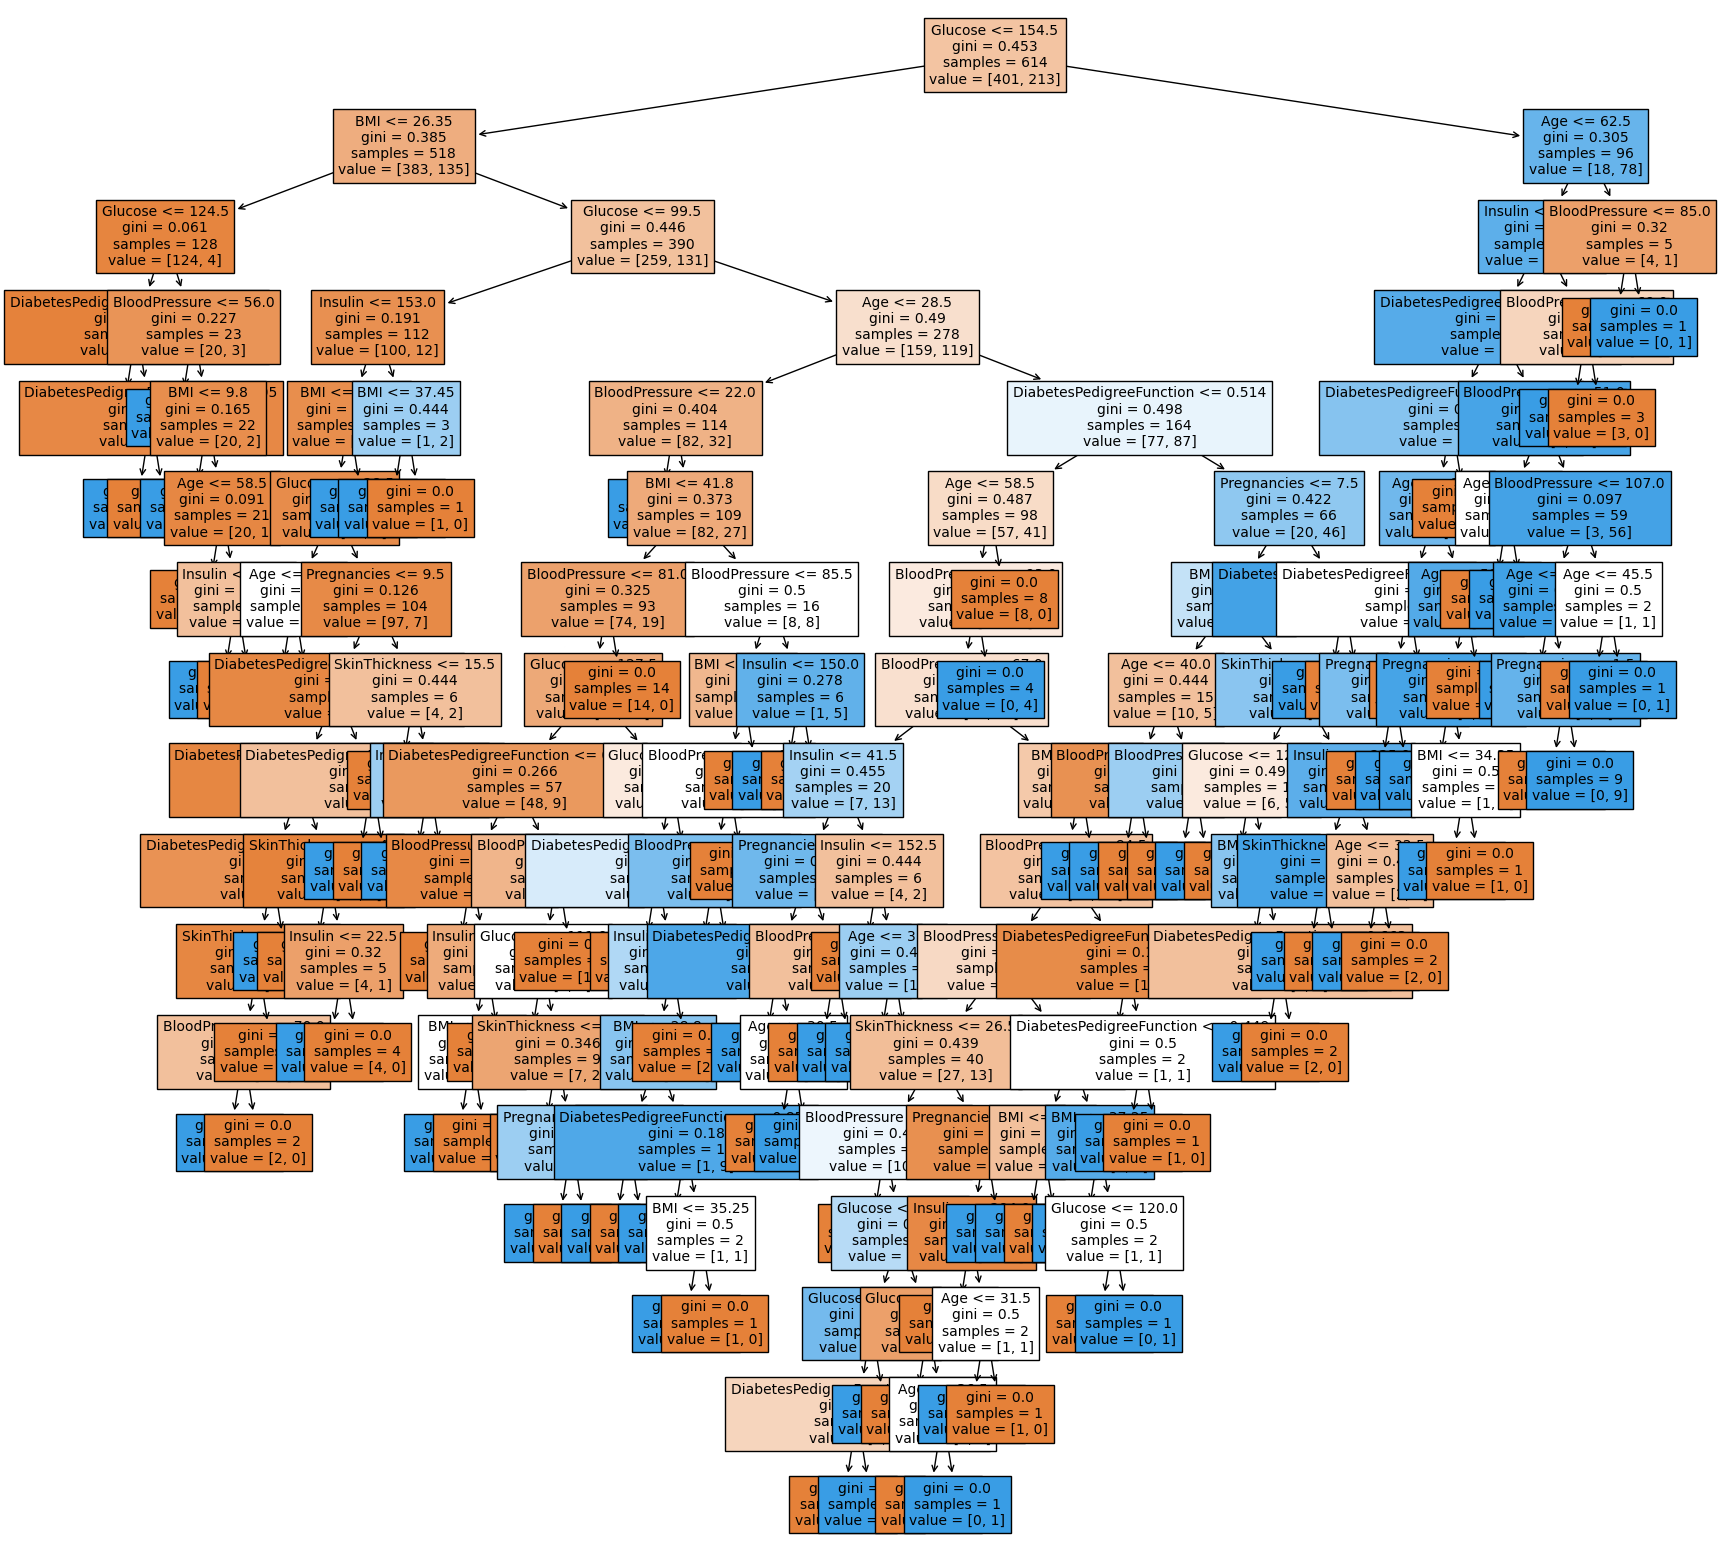

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model,
         feature_names = feature_names,
            filled = True,
                fontsize = 10) 

# Glucose가 크냐 작냐, BMI 수치가 특정수치 이상/이하?... 등등 내려가면 내려갈 수록 조건이 달라짐
# Glucose가 가장 큰 조건이므로 가장 위에 존재한다.
# 밑으로 갈수록 샘플의 수가 점점 줄어든다.

In [30]:
# graphviz 를 통해 시각화 합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphvis 와 파이썬에서 grapviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.

import graphviz
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'graphviz'

In [31]:
# 피처의 중요도 추출하기
model.feature_importances_

# 우리가 지정한 feature의 순서에 따라서 feature_importance를 표시해준다.

array([0.05323001, 0.30633801, 0.15073542, 0.04190636, 0.06678567,
       0.15189899, 0.11165153, 0.11745401])

<Axes: >

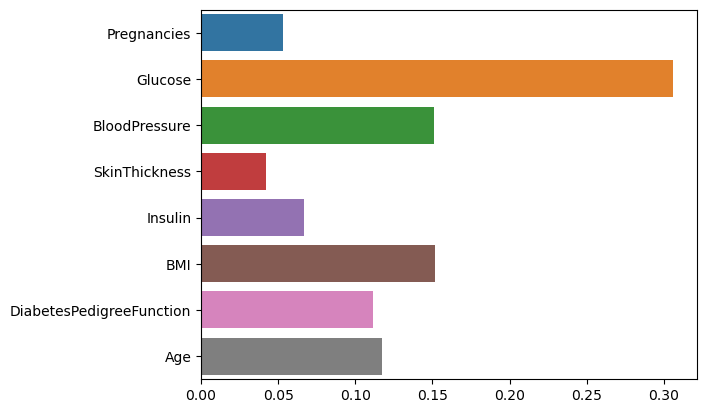

In [32]:
# 피처의 중요도 시각화 하기
sns.barplot(x = model.feature_importances_, y = feature_names)

- 가장 좋은 조건이 root에 오게 됨

- Glucose가 당뇨병인지 아닌지 판단하기 제일 좋은 조건이다.

## 12 정확도(Accuracy) 측정하기

In [37]:
# 실제 값 - 예측 값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

abs(y_test - y_predict)

614    0
615    0
616    1
617    0
618    0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Outcome, Length: 154, dtype: int64

In [38]:
# 모두 다 더해주면 실제로 다르게 예측된 값이 41개이다
diff_count = abs(y_test - y_predict).sum()
diff_count

41

In [35]:
abs(y_test - y_predict).sum() / len(y_test)

0.2662337662337662

26% 를 다르게 예측했다.

In [39]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구현한다고 보면 됩니다.
print(len(y_test))

(len(y_test) - diff_count) / len(y_test) * 100

154


73.37662337662337

73% 정확도

In [41]:
# 위에서 처럼 직접 구현할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100 

73.37662337662337

In [44]:
# model의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

73.37662337662337